In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/home/siddhant/Downloads/anime.csv')

In [3]:
#sample data
data.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [5]:
#No of rows
len(data)

12294

In [6]:
#Get data types
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [7]:
#Get the data statistics
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
#Find number of number of NULL values
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
#Percentage of null values
data.isnull().sum().sum()/len(data)*100

2.5784935741011874

In [10]:
#Null values after dropping
data = data.dropna()
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
#Finding duplicate values
data[data.duplicated()].shape
#No null values found

(0, 7)

In [12]:
data.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [13]:
#Drop non-useful columns
data.drop('anime_id', axis=1, inplace=True)
data.head(5)

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [14]:
for index, row in data.iterrows():
    if not row['episodes'].isdigit():
        data['episodes'][index] = 0

/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
data['episodes'] = data['episodes'].astype(int)
data.dtypes

name         object
genre        object
type         object
episodes      int64
rating      float64
members       int64
dtype: object

Text(0, 0.5, 'Count')

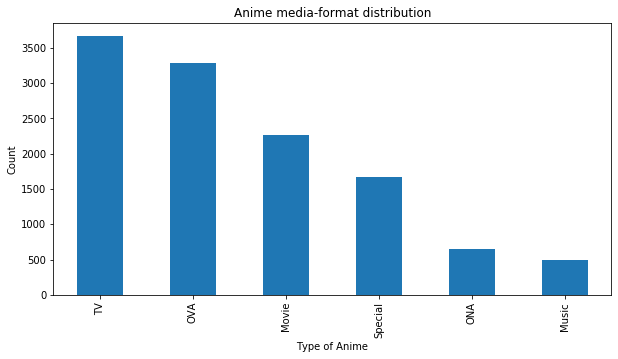

In [16]:
#Anime Type distribution
data.type.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Anime media-format distribution')
plt.xlabel('Type of Anime')
plt.ylabel('Count')

Text(0.5, 1.0, 'Rating by Type Graph')

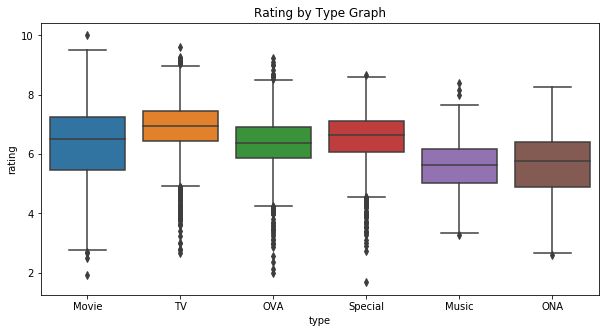

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='rating', data=data)
plt.title('Rating by Type Graph')

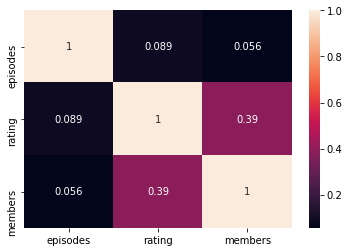

In [18]:
dataCorr = data.corr()
sns.heatmap(dataCorr, annot=True)

In [19]:
data['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12017, dtype: object

In [20]:
#Converting list-like column value to separate rows
dataGenres = data
dataGenres = dataGenres.assign(genre=data.genre.str.split(', ')).explode('genre')
dataGenres

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,Kimi no Na wa.,School,Movie,1,9.37,200630
0,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,Under World,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [21]:
dataGenres.genre.unique()

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei',
       'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids',
       'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

Text(0, 0.5, 'Count')

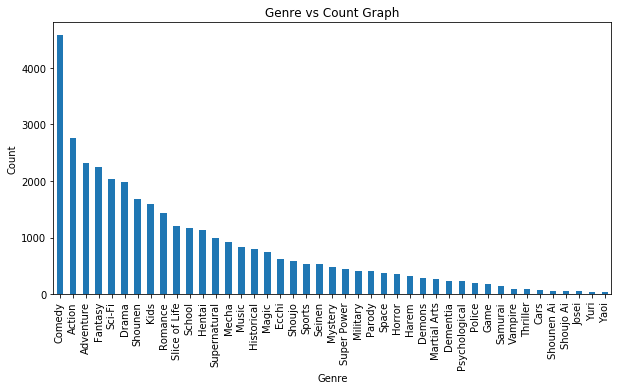

In [22]:
dataGenres.genre.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Genre vs Count Graph')
plt.xlabel('Genre')
plt.ylabel('Count')

Text(0.5, 1.0, 'Rating by Genre Box-plot')

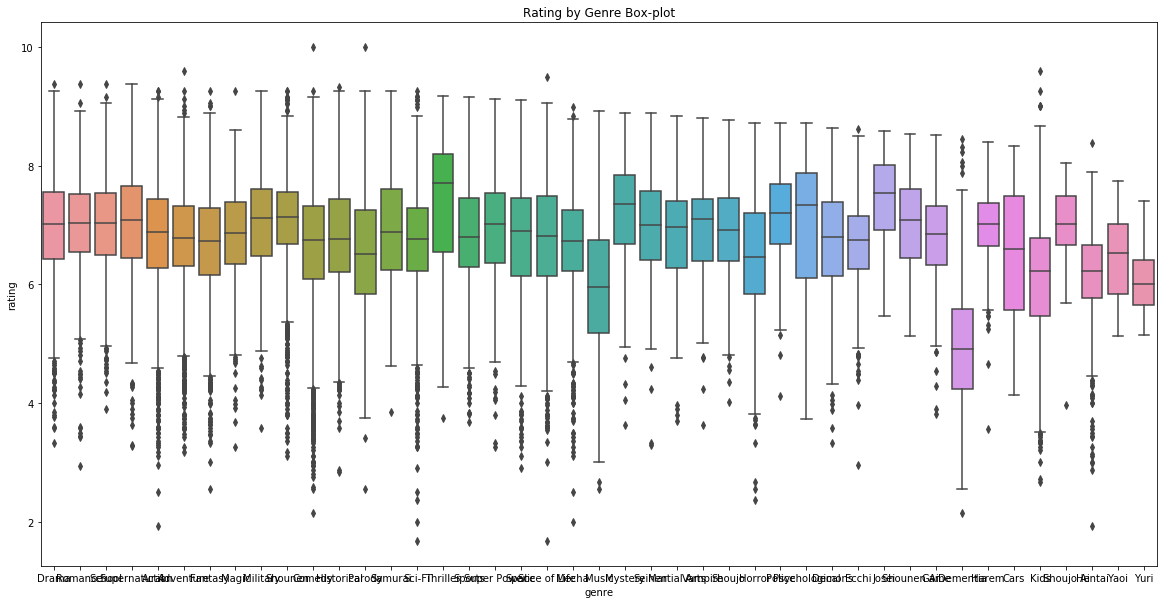

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='rating', data=dataGenres)
plt.title('Rating by Genre Box-plot')

In [26]:
#Label encoding Genre column
dataGenres["genre"] = dataGenres["genre"].astype('category')
dataGenres.head(5)

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,Kimi no Na wa.,School,Movie,1,9.37,200630
0,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665


In [29]:
dataGenres['genre'].cat.codes

0         6
0        25
0        27
0        38
1         0
         ..
12289    11
12290    11
12291    11
12292    11
12293    11
Length: 35595, dtype: int8